In [128]:
import tensorflow as tf
import cv2, os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.optimizers import SGD, Adam
from keras.layers import Dropout
from sklearn.metrics import confusion_matrix

In [129]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()
print(train_data.shape)
print(train_target.shape)
print(test_data.shape)
print(test_target.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


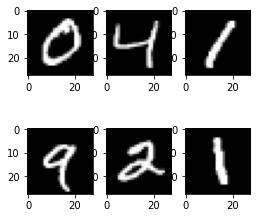

In [130]:
w=10
h=10

fig=plt.figure(figsize=(4,4))

columns=3
rows=2

for i in range(1, columns*rows+1):
    fig.add_subplot(rows,columns,i)
    plt.imshow(train_data[i],cmap=plt.get_cmap('gray'))
plt.show()

In [131]:
train_data[0].shape

(28, 28)

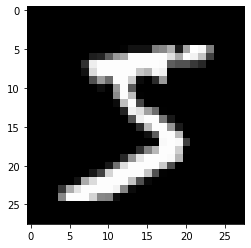

In [132]:
plt.imshow(train_data[0],cmap='gray')
plt.show()


In [133]:
train_target[0]

5

In [134]:
new_train_target=np_utils.to_categorical(train_target) # convert to categorical form
new_test_target=np_utils.to_categorical(test_target)

print(train_target[:10])
print(new_train_target[:10])

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [135]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='elu'))
model.add(Dropout(0.2, input_shape=(60,)))
model.add(Dense(64,activation='elu'))
model.add(Dropout(0.2, input_shape=(60,)))
model.add(Dense(10,activation='softmax'))

#sgd = SGD(lr=0.1, momentum=0.9)

model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

In [136]:
new_train_data=train_data
new_test_data=test_data

In [137]:
new_train_data.shape

(60000, 28, 28)

In [138]:
history=model.fit(train_data,new_train_target,validation_data=(new_test_data,new_test_target),epochs=2)

Epoch 1/2
1875/1875 [==============================] - 12s 7ms/step - loss: 3.7012 - accuracy: 0.5871 - val_loss: 0.6172 - val_accuracy: 0.8057
Epoch 2/2
1875/1875 [==============================] - 12s 7ms/step - loss: 0.8840 - accuracy: 0.7665 - val_loss: 0.3691 - val_accuracy: 0.8901


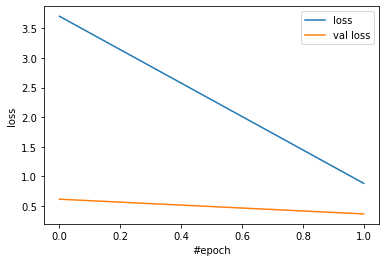

In [139]:
plt.plot(model.history.history['loss'],label='loss')
plt.plot(model.history.history['val_loss'],label='val loss')
plt.legend()
plt.xlabel('#epoch')
plt.ylabel('loss')
plt.show()

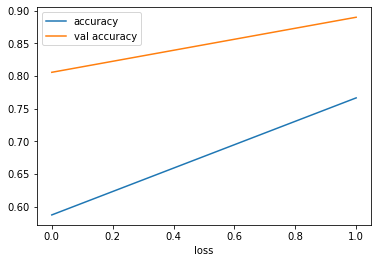

In [140]:
plt.plot(model.history.history['accuracy'],label='accuracy')
plt.plot(model.history.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.xlabel('#epoch')
plt.xlabel('loss')
plt.show()

In [236]:
data_path=r'D:\Semester 08\Intelligent systems design\2.1\my_test_images'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict={} #empty dictionary

for i in range(len(categories)):
    label_dict[categories[i]]=labels[i]

print(label_dict)
print(categories)
print(labels)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [237]:
img_size=28

data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        #cv2.imshow('LIVE',img)
        #cv2.waitKey(100)
        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            _,inverted = cv2.threshold(resized,150,255,cv2.THRESH_BINARY_INV)
            kernel = np.ones((1,1),np.uint8)
            dilated = cv2.dilate(inverted,kernel,iterations = 1)
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(dilated)
            target.append(label_dict[category])
            
        except Exception as e:
            print(e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [238]:
print(target)

[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9]


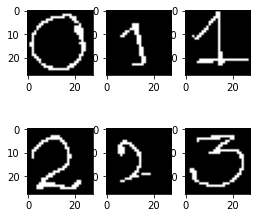

In [239]:
w=10
h=10

fig=plt.figure(figsize=(4,4))

columns=3
rows=2

for i in range(1, columns*rows+1):
    fig.add_subplot(rows,columns,i)
    plt.imshow(data[i],cmap=plt.get_cmap('gray'))
plt.show()

In [240]:
data=np.array(data)
target=np.array(target)
#target_new=np_utils.to_categorical(target)
print(data.shape,target.shape)

(20, 28, 28) (20,)


In [241]:
predict=[]

for i in range(len(data)):
    
    label_predict = np.argmax(model.predict(data[i].reshape(1,28,28)), axis=-1)
    predict.append(label_predict)

predict = np.array(predict).flatten()
  
print(target.shape, predict.shape)

(20,) (20,)


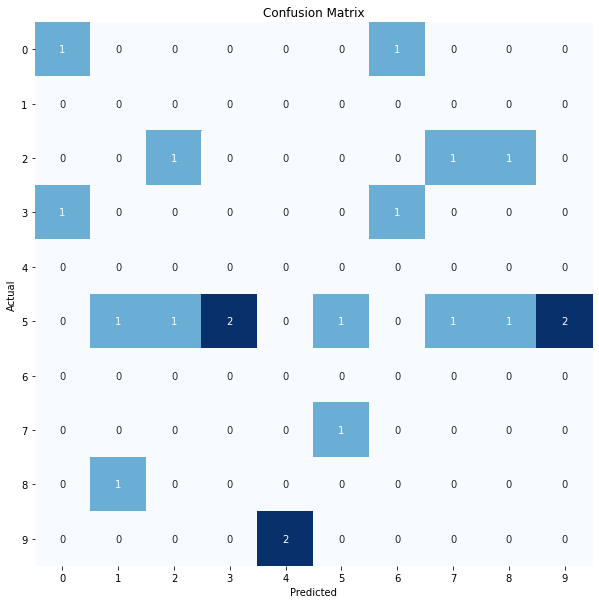

In [242]:
ticklabels = ['0','1','2','3','4','5','6','7','8','9']
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
cm = confusion_matrix(predict,target ) 
sns.heatmap(cm, annot=True, cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix') 
ax.set_xlabel('Predicted') 
ax.set_ylabel('Actual') 
ax.set_xticklabels(ticklabels) 
ax.set_yticklabels(ticklabels, rotation=0)
plt.show()

In [ ]:
model.save_weights('FFNN-MNIST.h5')